In [73]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import warnings 

In [74]:
df = pd.read_csv('../../../data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [75]:
round(df.describe(), 2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4.580474e+09,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2.876736e+09,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1.000102e+06,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


In [76]:
df.drop(['id'], axis=1, inplace=True)

In [77]:
df['date']=pd.to_datetime(df['date'])

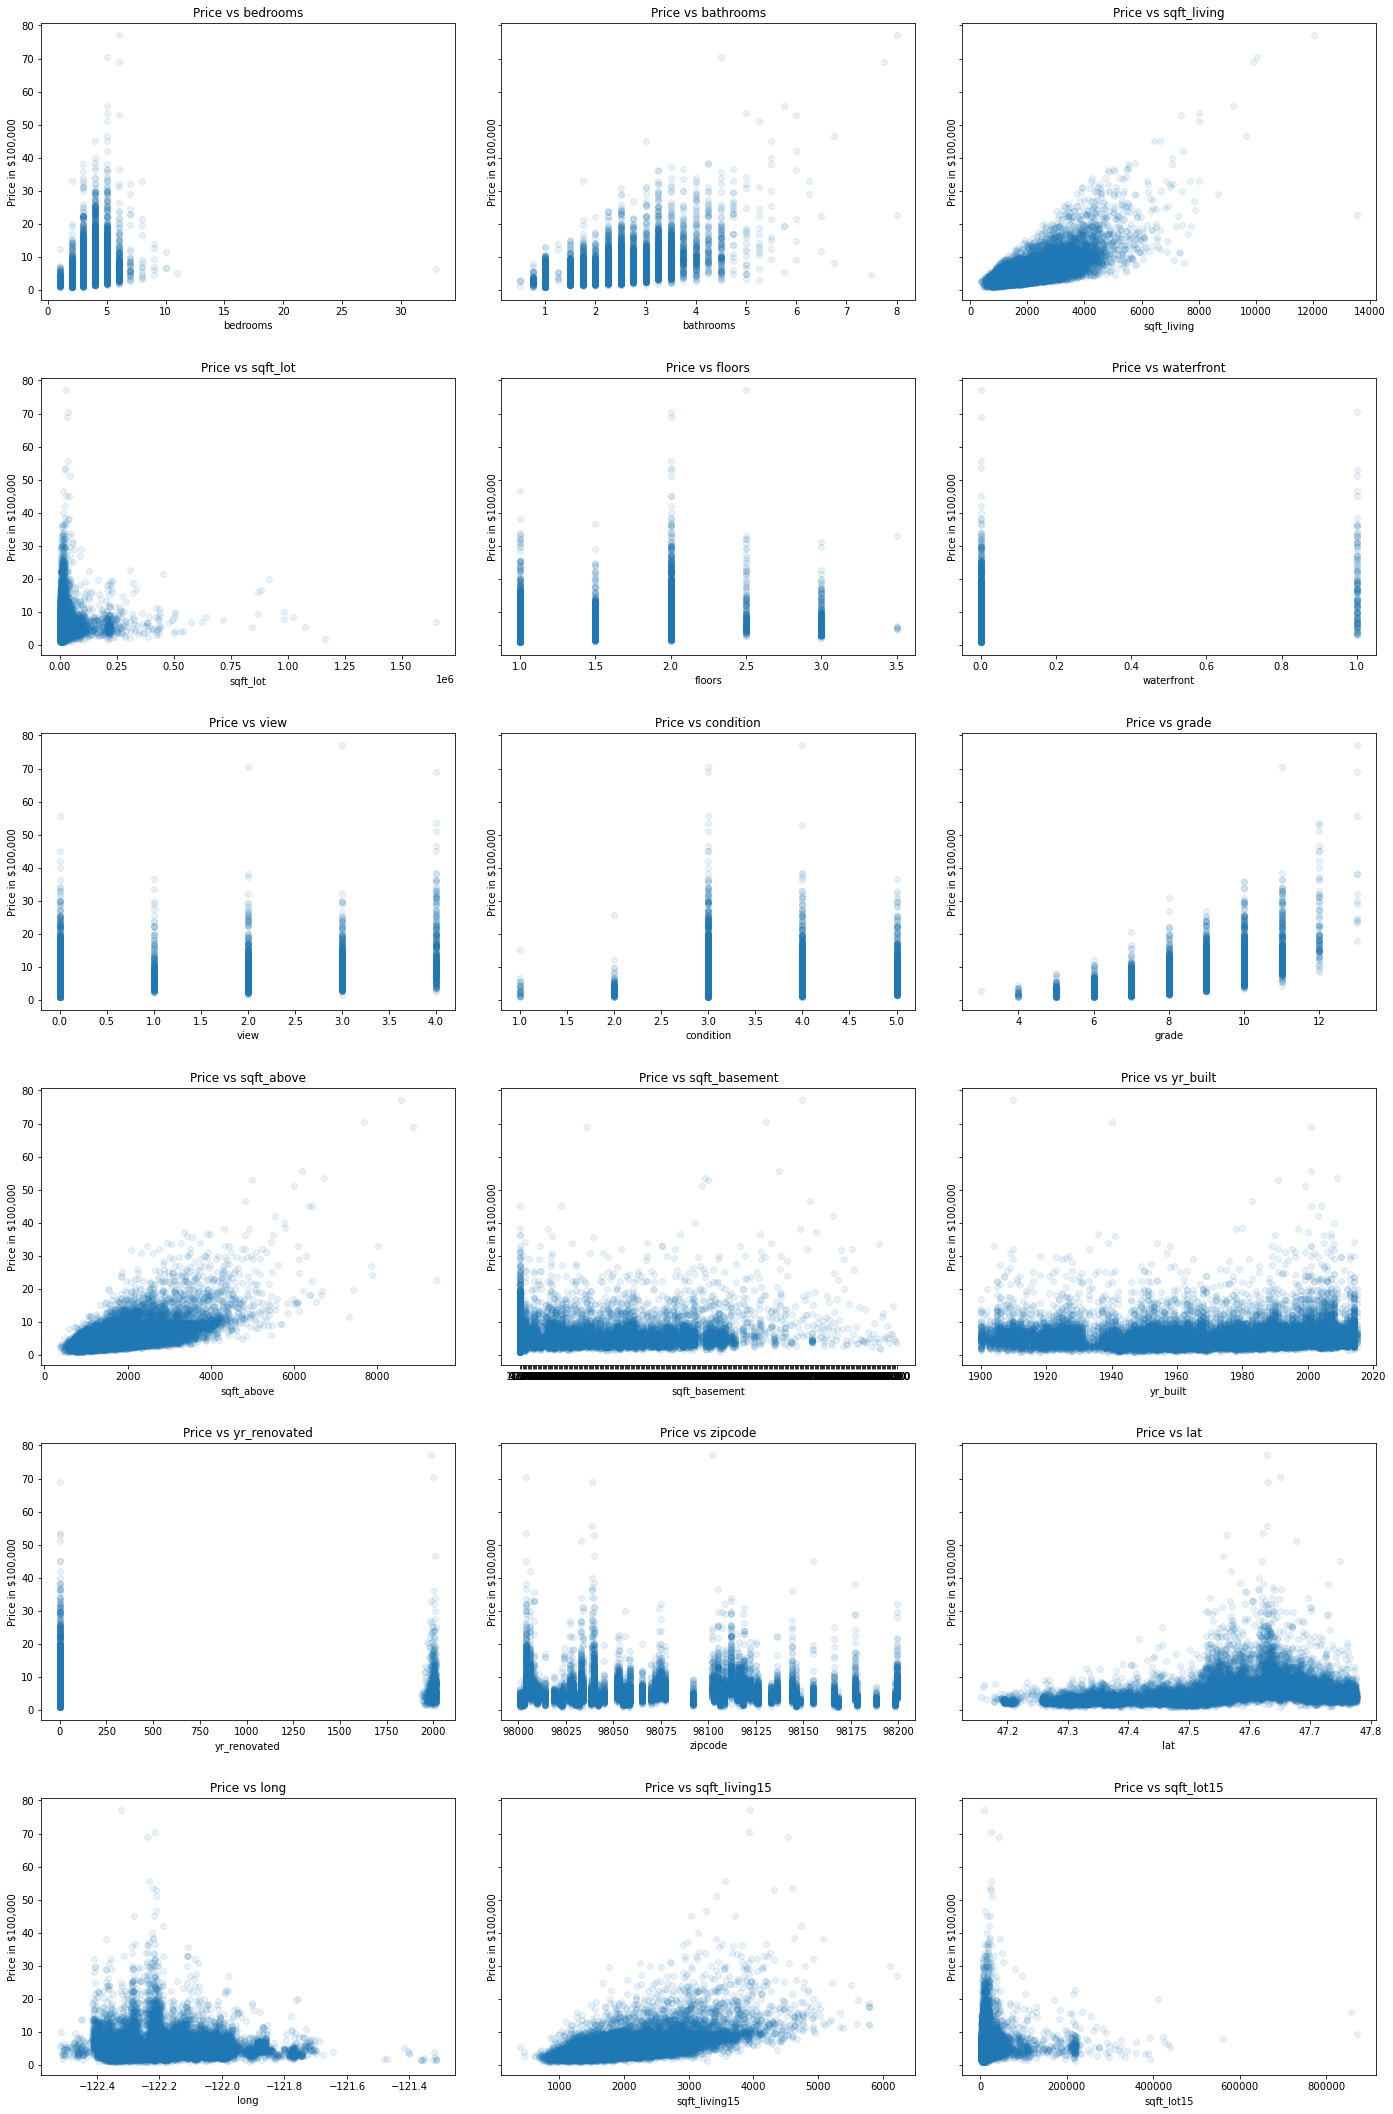

In [78]:
fig, axes = plt.subplots(6, 3, figsize=(20,30), sharey=True)
for ax, column in zip(axes.flatten(), df.columns[2:]):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price in $100,000')
fig.tight_layout(pad=3.0)

<ipython-input-79-cbfb53bb7ecf>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      dtype=obj

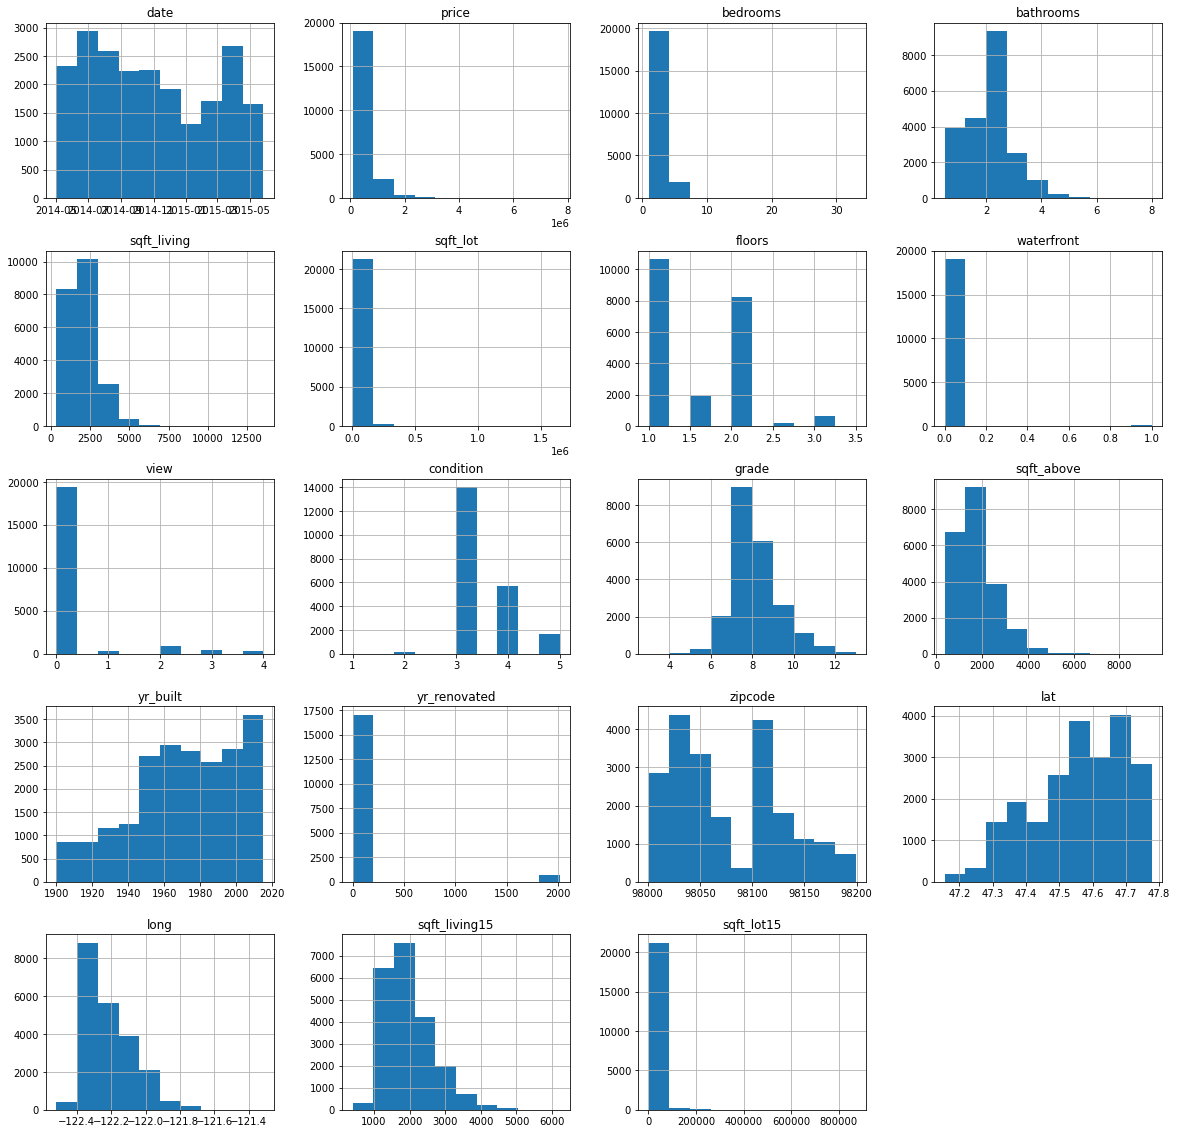

In [79]:
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
df.hist(ax = ax)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     19221 non-null  float64       
 8   view           21534 non-null  float64       
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  object        
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   17755 non-null  float64       
 15  zipcode        2159

In [81]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

In [82]:
for col in df.columns:
    print('\n')
    print(col, df[col].value_counts())



date 2014-06-23    142
2014-06-26    131
2014-06-25    131
2014-07-08    127
2015-04-27    126
             ... 
2014-05-17      1
2014-07-27      1
2014-08-03      1
2014-11-02      1
2015-05-24      1
Name: date, Length: 372, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
285750.0      1
162950.0      1
612995.0      1
255544.0      1
897000.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       

In [83]:
df['bedrooms'].describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [84]:
mean_bed_no_outliers = df.loc[(df['bedrooms'] != 33) | (df['bedrooms'] != 0), 'bedrooms'].mean()

In [85]:
df['bedrooms'] = np.where((df['bedrooms'] == 33) | (df['bedrooms'] == 0), round(mean_bed_no_outliers), df['bedrooms'])

In [86]:
df['bathrooms'].describe()

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [87]:
print(sum(df['bathrooms'] >= 6.0))
print(df['bathrooms'].quantile(.9994))

16
6.0


In [88]:
mean_bath_no_outliers = df.loc[(df['bathrooms'] != 0) | (df['bathrooms'] < 6.0), 'bathrooms'].mean()

In [89]:
df['bathrooms'] = np.where((df['bathrooms'] == 0) | (df['bathrooms'] >= 6.0), round(mean_bath_no_outliers), df['bathrooms'])

In [90]:
df_pred = df.drop(['date', 'price', 'lat', 'long'], axis=1)
df_pred.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650
1,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639
2,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,2720,8062
3,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000
4,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503


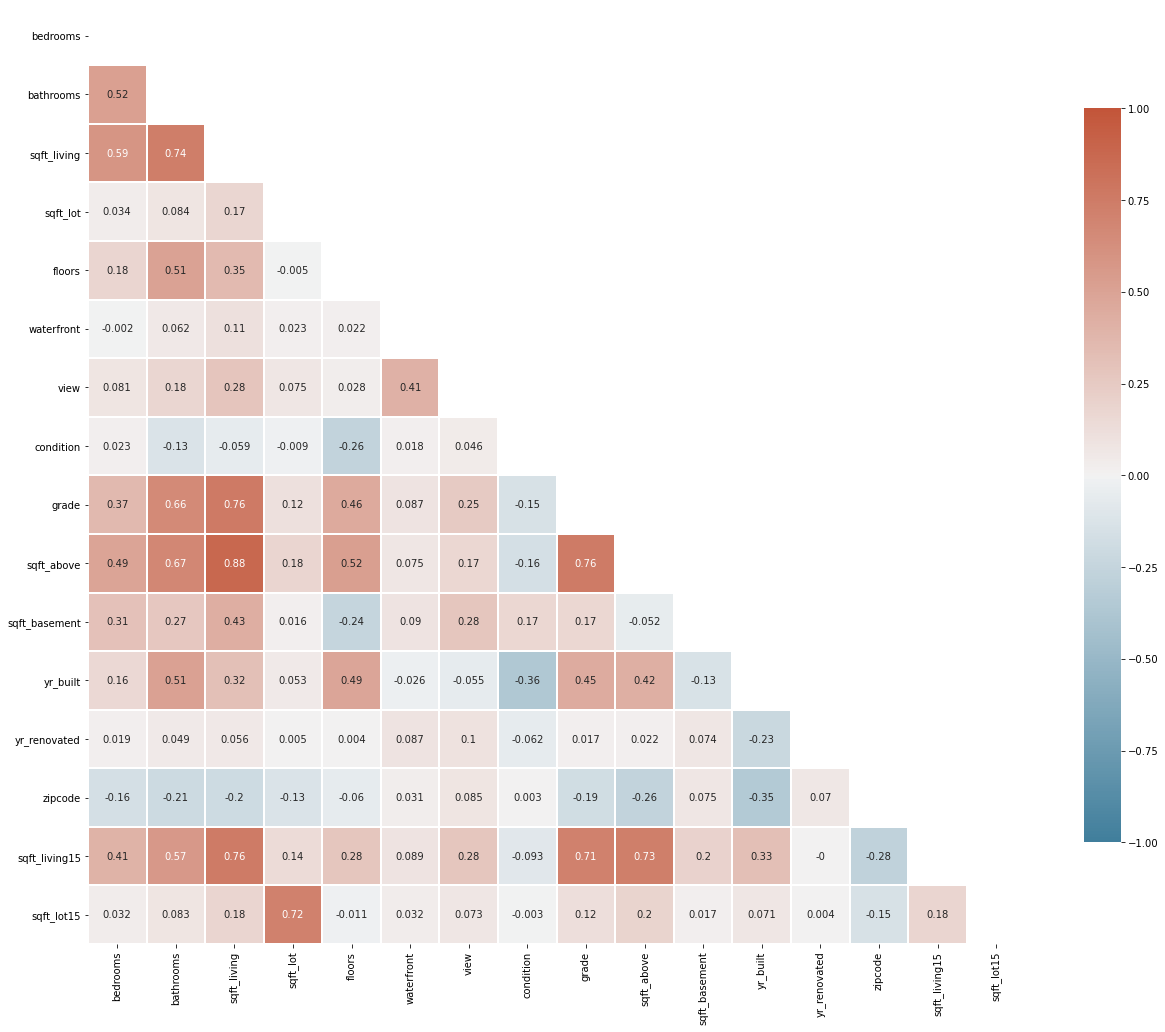

In [91]:
corr = round(df_pred.corr(), 3)

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(21, 18))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=1, cbar_kws={"shrink": .75}, annot=True)
plt.show()

In [ ]:
#cells to take out of df - bathrooms, sqft_above, grade,sgft_living15, sgft_lot15, bedrooms

In [92]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
corr_pred = df_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_pred['pairs'] = list(zip(corr_pred.level_0, corr_pred.level_1))

# set index to pairs
corr_pred.set_index(['pairs'], inplace=True)

#drop level columns
corr_pred.drop(columns=['level_0', 'level_1'], inplace=True)

# rename correlation column as cc rather than 0
corr_pred.columns = ['cc']

# drop duplicates
corr_pred.drop_duplicates(inplace=True)

In [93]:
corr_pred[(corr_pred.cc>.75) & (corr_pred.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(sqft_living, grade)",0.762779
"(sqft_living, sqft_living15)",0.756402
"(grade, sqft_above)",0.756073


In [94]:
categorical = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','zipcode']

for column in df[categorical]:
    df[categorical] = df[categorical].astype('category')

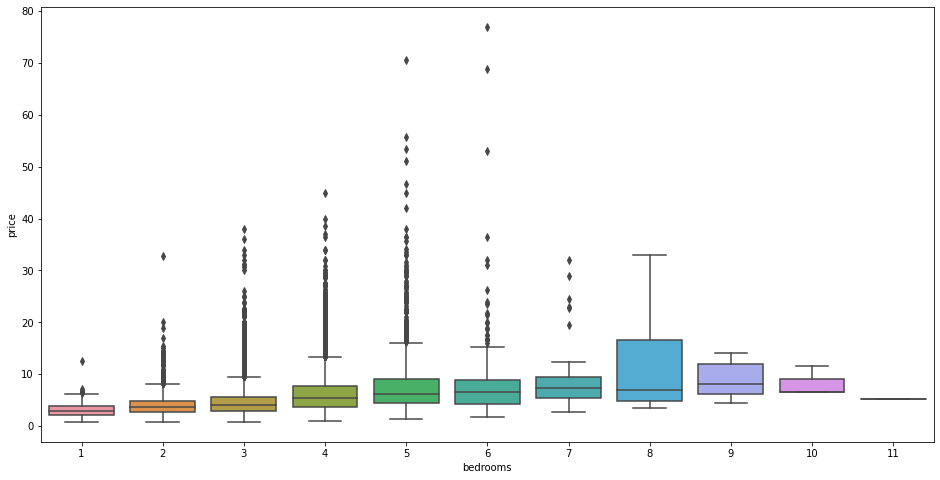

In [95]:
var = 'bedrooms'
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var, y='price', data=data)

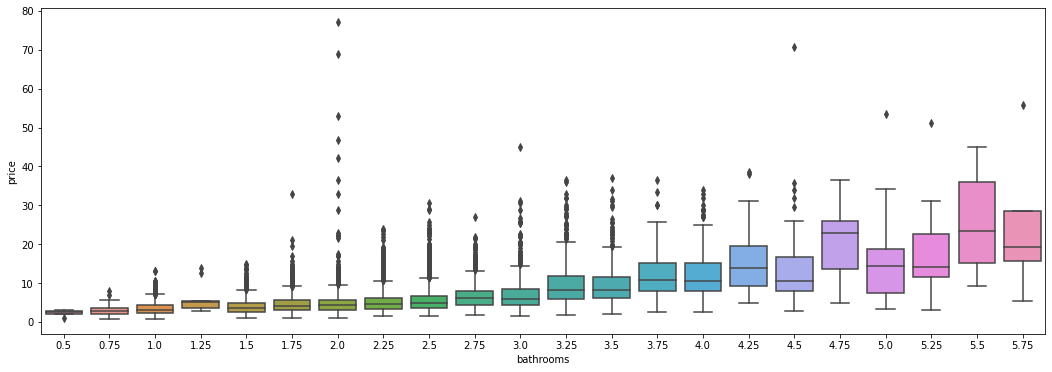

In [96]:
var = 'bathrooms'
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(18,6))
fig = sns.boxplot(x=var, y='price', data=data)

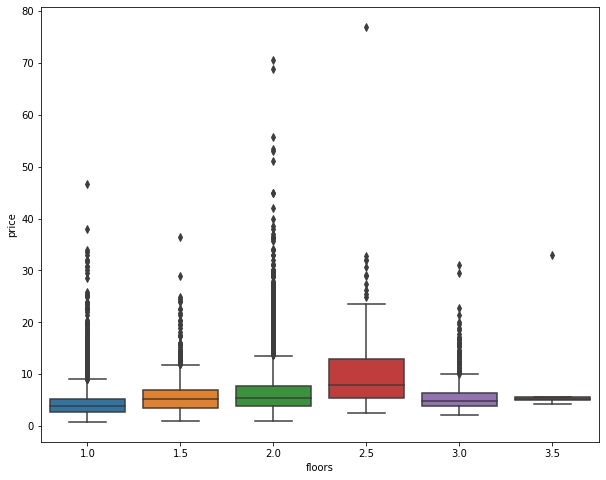

In [97]:
var = 'floors'
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var, y='price', data=data)

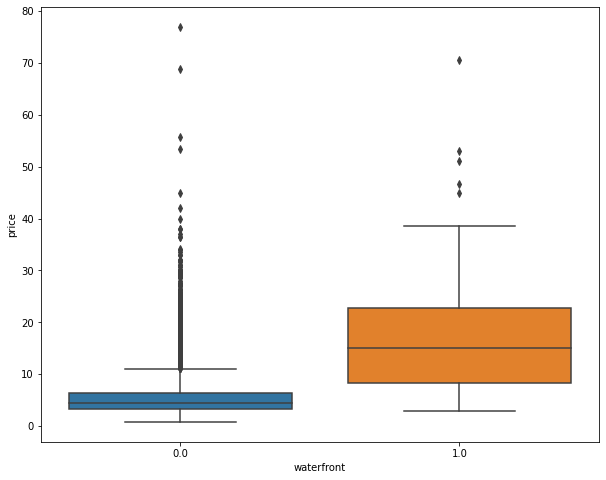

In [98]:
var = 'waterfront'
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var, y='price', data=data)
#1 being on waterfront then 0 being off water front

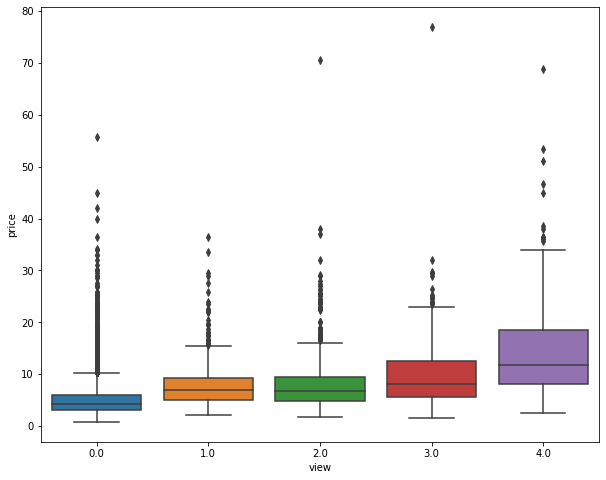

In [99]:
var = 'view'
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var, y='price', data=data)
#view is graded 1-4 

In [100]:
mean_no_view = df.loc[(df['view'] == 0), 'price'].mean()
mean_view = df.loc[(df['view'] != 0), 'price'].mean()
mean_view - mean_no_view
#a difference in the means 

431845.7473293351

In [101]:
n_view = len(df.loc[(df['view'] != 0)])
n_no_view = len(df.loc[(df['view'] == 0)])

crit = stats.t.ppf(1-0.025, (n_view+n_no_view-2))
crit

1.9600738433933655

In [102]:
no_view_price = df.loc[(df['view'] == 0), 'price']
view_price = df.loc[(df['view'] != 0), 'price']

In [103]:
stats.ttest_ind(no_view_price, view_price)

Ttest_indResult(statistic=-55.58158224068533, pvalue=0.0)

In [104]:
df['yes_view'] = np.where(df['view'] != 0, 1, 0)

In [105]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yes_view
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


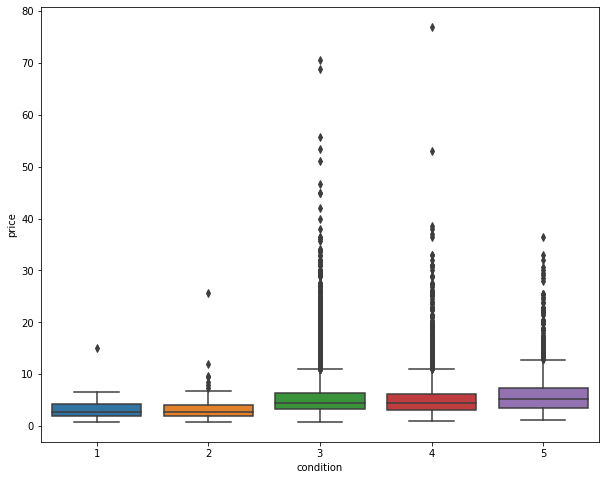

In [106]:
var = 'condition'
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var, y='price', data=data)
#

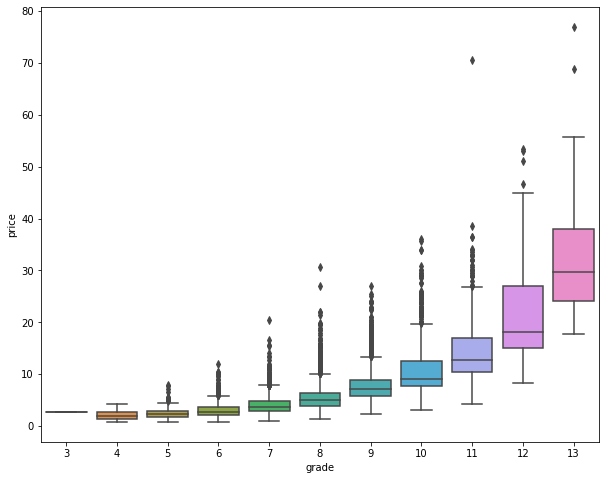

In [107]:
var = 'grade'
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var, y='price', data=data)

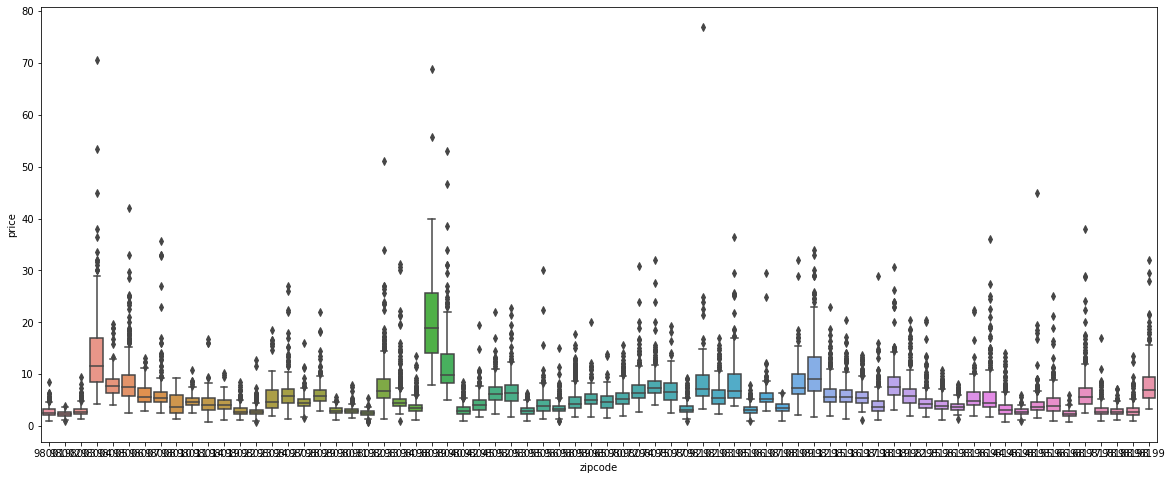

In [108]:
var = 'zipcode'
data = pd.concat([df['price'] / 100_000, df[var]], axis=1)
fig, ax = plt.subplots(figsize=(20,8))
fig = sns.boxplot(x=var, y='price', data=data)

In [ ]:
#New starting point 

In [109]:
formula = 'price ~ C(zipcode)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)
#not sure what this does 

                  sum_sq       df           F  PR(>F)
C(zipcode)  1.186987e+15     69.0  214.357499     0.0
Residual    1.727595e+15  21527.0         NaN     NaN


In [110]:
sum(df['long'] > -121.6763)

19

In [111]:
mean_price_not_rural_east = df.loc[df['long'] < -121.6763, 'price'].mean()
mean_price_long_rural_east = df.loc[df['long'] > -121.6763, 'price'].mean()
mean_price_not_rural_east - mean_price_long_rural_east

# difference in mean between rural east and rest of df

293344.1172100239

In [112]:
df_rural_east = df.loc[df['long'] > -121.6763]
df_rural_east

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yes_view
2587,2014-05-08,134000.0,2,1.50,980,5000,2.0,0.0,0.0,3,...,980,0.0,1922,2003.0,98014,47.7076,-121.359,1040,5000,0
2925,2015-04-30,167000.0,1,1.00,780,10235,1.5,0.0,0.0,3,...,780,0.0,1989,NaN,98014,47.7130,-121.315,930,10165,0
3292,2014-06-24,380000.0,3,2.25,1860,15559,2.0,0.0,0.0,4,...,1860,0.0,1963,0.0,98022,47.1559,-121.646,1110,11586,0
4199,2014-07-09,150000.0,3,0.75,490,38500,1.5,0.0,0.0,4,...,490,0.0,1959,0.0,98014,47.7112,-121.315,800,18297,0
4844,2014-05-21,525000.0,3,2.75,2100,10362,2.0,0.0,0.0,3,...,1510,590.0,1998,0.0,98045,47.4347,-121.417,2240,11842,0
5861,2014-08-05,175000.0,2,1.75,1050,9800,1.5,NaN,0.0,4,...,1050,0.0,1975,0.0,98019,47.7595,-121.473,1230,12726,0
6083,2015-04-16,150000.0,3,1.00,890,6488,1.5,0.0,0.0,3,...,890,0.0,1928,0.0,98014,47.7087,-121.352,1330,16250,0
10084,2014-11-11,200000.0,2,1.75,1320,13052,1.5,0.0,0.0,3,...,1320,0.0,1980,0.0,98014,47.7120,-121.352,1320,13052,0
10886,2014-10-22,241000.0,2,1.75,1070,9750,1.5,NaN,0.0,3,...,1070,0.0,1995,0.0,98014,47.7131,-121.319,970,9750,0
13059,2014-10-10,155000.0,2,1.00,1010,43056,1.5,0.0,0.0,3,...,1010,0.0,1990,NaN,98014,47.7105,-121.316,830,18297,0


In [113]:
df['rural_east'] = np.where(df['long']>= -121.6763, 1, 0)

In [114]:
df['rural_east'].value_counts()

0    21578
1       19
Name: rural_east, dtype: int64

In [115]:
cat_list_2 = ['bedrooms', 'bathrooms', 'grade']
dummies = pd.get_dummies(df[cat_list_2], prefix=cat_list_2, drop_first=True)

df_preprocessed = df.drop(cat_list_2, axis=1)

df_preprocessed = pd.concat([df_preprocessed, dummies], axis=1)

df_preprocessed.head().dropna()

,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
1,2014-12-09,538000.0,2570,7242,2.0,0.0,0.0,3,2170,400.0,...,0,0,0,1,0,0,0,0,0,0
3,2014-12-09,604000.0,1960,5000,1.0,0.0,0.0,5,1050,910.0,...,0,0,0,1,0,0,0,0,0,0
4,2015-02-18,510000.0,1680,8080,1.0,0.0,0.0,3,1680,0.0,...,0,0,0,0,1,0,0,0,0,0


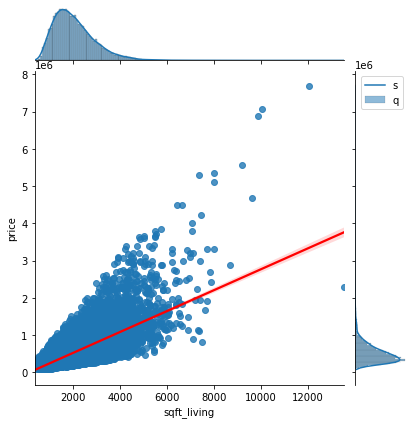

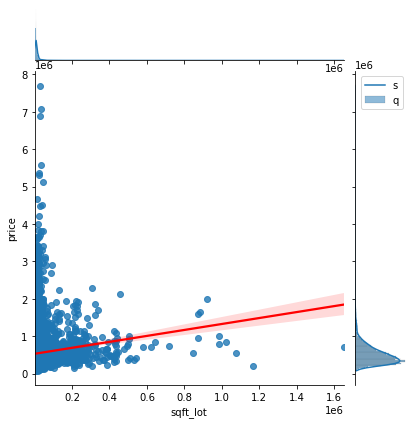

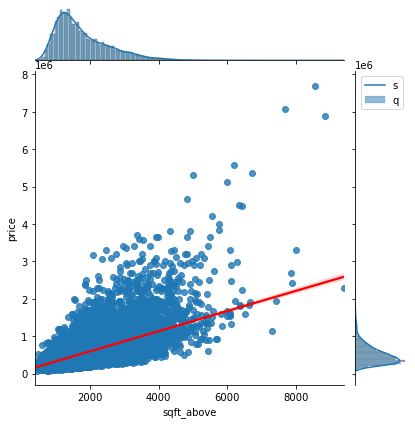

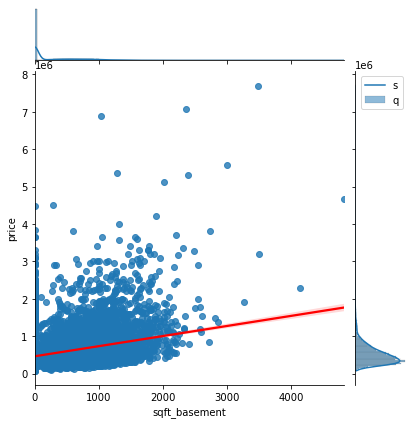

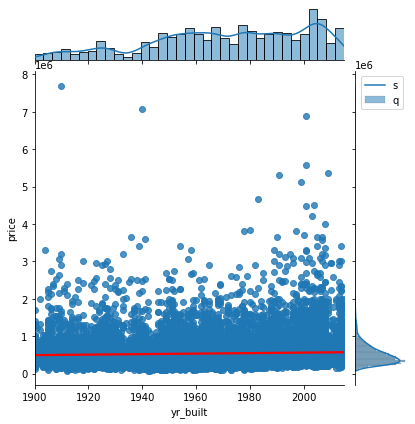

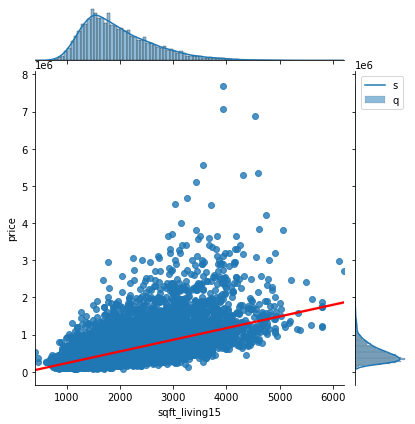

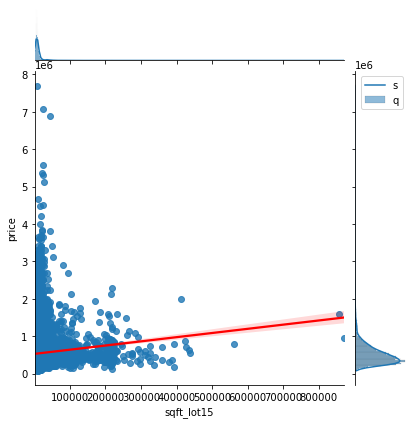

In [116]:
continuous = ['sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','sqft_living15','sqft_lot15']

for column in continuous:
    sns.jointplot(x=column, y="price", data=df, kind='reg', label=column,joint_kws={'line_kws':{'color':'red'}})
    plt.legend('sqft_living')
    plt.show()

In [117]:
df_preprocessed['basement'] = np.where((df_preprocessed['sqft_basement'] != 0), 1, 0)
#boolean column 

In [118]:
yr_built_med = df_preprocessed['yr_built'].median()
yr_built_med

1975.0

In [119]:
df_preprocessed['yr_built_reno'] = np.where((df_preprocessed['yr_built'] < 1974) & (df_preprocessed['yr_renovated'] == 0), 0,1)

In [120]:
df_preprocessed['yr_built_reno'].value_counts()

1    13634
0     7963
Name: yr_built_reno, dtype: int64

In [129]:
features = ['sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition','yes_view', 'rural_east', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4',
       'bedrooms_5', 'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9',
       'bedrooms_10', 'bedrooms_11', 'bathrooms_0.75', 'bathrooms_1.0',
       'bathrooms_1.25', 'bathrooms_1.5', 'bathrooms_1.75', 'bathrooms_2.0',
       'bathrooms_2.25', 'bathrooms_2.5', 'bathrooms_2.75', 'bathrooms_3.0',
       'bathrooms_3.25', 'bathrooms_3.5', 'bathrooms_3.75', 'bathrooms_4.0',
       'bathrooms_4.25', 'bathrooms_4.5', 'bathrooms_4.75', 'bathrooms_5.0',
       'bathrooms_5.25', 'bathrooms_5.5', 'bathrooms_5.75',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13', 'basement',
       'yr_built_reno']

df_features = df_preprocessed[features]

target = df_preprocessed
target

,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,basement,yr_built_reno
0,2014-10-13,221900.0,1180,5650,1.0,NaN,0.0,3,1180,0.0,...,0,1,0,0,0,0,0,0,0,0
1,2014-12-09,538000.0,2570,7242,2.0,0.0,0.0,3,2170,400.0,...,0,1,0,0,0,0,0,0,1,1
2,2015-02-25,180000.0,770,10000,1.0,0.0,0.0,3,770,0.0,...,1,0,0,0,0,0,0,0,0,1
3,2014-12-09,604000.0,1960,5000,1.0,0.0,0.0,5,1050,910.0,...,0,1,0,0,0,0,0,0,1,0
4,2015-02-18,510000.0,1680,8080,1.0,0.0,0.0,3,1680,0.0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,1530,1131,3.0,0.0,0.0,3,1530,0.0,...,0,0,1,0,0,0,0,0,0,1
21593,2015-02-23,400000.0,2310,5813,2.0,0.0,0.0,3,2310,0.0,...,0,0,1,0,0,0,0,0,0,1
21594,2014-06-23,402101.0,1020,1350,2.0,0.0,0.0,3,1020,0.0,...,0,1,0,0,0,0,0,0,0,1
21595,2015-01-16,400000.0,1600,2388,2.0,NaN,0.0,3,1600,0.0,...,0,0,1,0,0,0,0,0,0,1


In [122]:
len(features)

51

In [134]:
target.dropna()

,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,basement,yr_built_reno
1,2014-12-09,538000.0,2570,7242,2.0,0.0,0.0,3,2170,400.0,...,0,1,0,0,0,0,0,0,1,1
3,2014-12-09,604000.0,1960,5000,1.0,0.0,0.0,5,1050,910.0,...,0,1,0,0,0,0,0,0,1,0
4,2015-02-18,510000.0,1680,8080,1.0,0.0,0.0,3,1680,0.0,...,0,0,1,0,0,0,0,0,0,1
5,2014-05-12,1230000.0,5420,101930,1.0,0.0,0.0,3,3890,1530.0,...,0,0,0,0,0,1,0,0,1,1
8,2015-04-15,229500.0,1780,7470,1.0,0.0,0.0,3,1050,730.0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2015-02-19,475000.0,1310,1294,2.0,0.0,0.0,3,1180,130.0,...,0,0,1,0,0,0,0,0,1,1
21592,2014-05-21,360000.0,1530,1131,3.0,0.0,0.0,3,1530,0.0,...,0,0,1,0,0,0,0,0,0,1
21593,2015-02-23,400000.0,2310,5813,2.0,0.0,0.0,3,2310,0.0,...,0,0,1,0,0,0,0,0,0,1
21594,2014-06-23,402101.0,1020,1350,2.0,0.0,0.0,3,1020,0.0,...,0,1,0,0,0,0,0,0,0,1


In [135]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, test_size=0.3, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

15117 6480 15117 6480


In [140]:
#instantiate a linear regression object
lm = LinearRegression()